## Package importing

In [2]:
from fastai.vision.all import *
from pathlib import Path

In [3]:
path = Path.cwd()/'../datasets/bears'
path

Path('/home/fastai-2020-lalkrishna/My-files/Projects/../datasets/bears')

## Data Loading

In [17]:
bears = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        splitter = RandomSplitter(valid_pct=0.3),
        get_items = get_image_files,
        get_y = parent_label,
        item_tfms = Resize(128),
        batch_tfms= aug_transforms(mult=2))

In [18]:
data = bears.dataloaders(path)

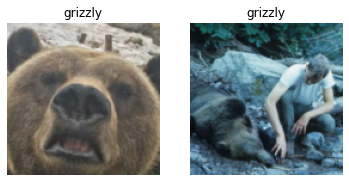

In [19]:
data.valid.show_batch(max_n = 2)

#### Image Augmentation

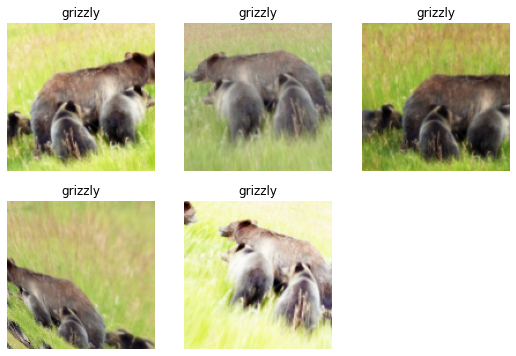

In [24]:
data.train.show_batch(max_n = 5, unique=True)

### training

In [30]:
model = cnn_learner(data, resnet34, metrics=error_rate)
model.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


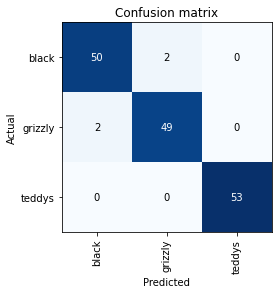

In [31]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

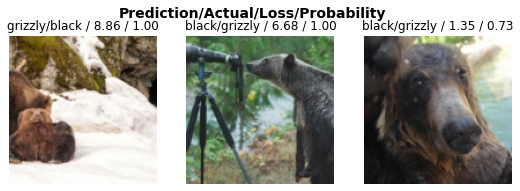

In [32]:
interp.plot_top_losses(3)

### exporting model

In [1]:
model.export(fname = 'bear.pkl')

NameError: name 'model' is not defined

In [4]:
model_loaded = load_learner('bear.pkl')

In [5]:
from fastai.vision.widgets import FileUpload

upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

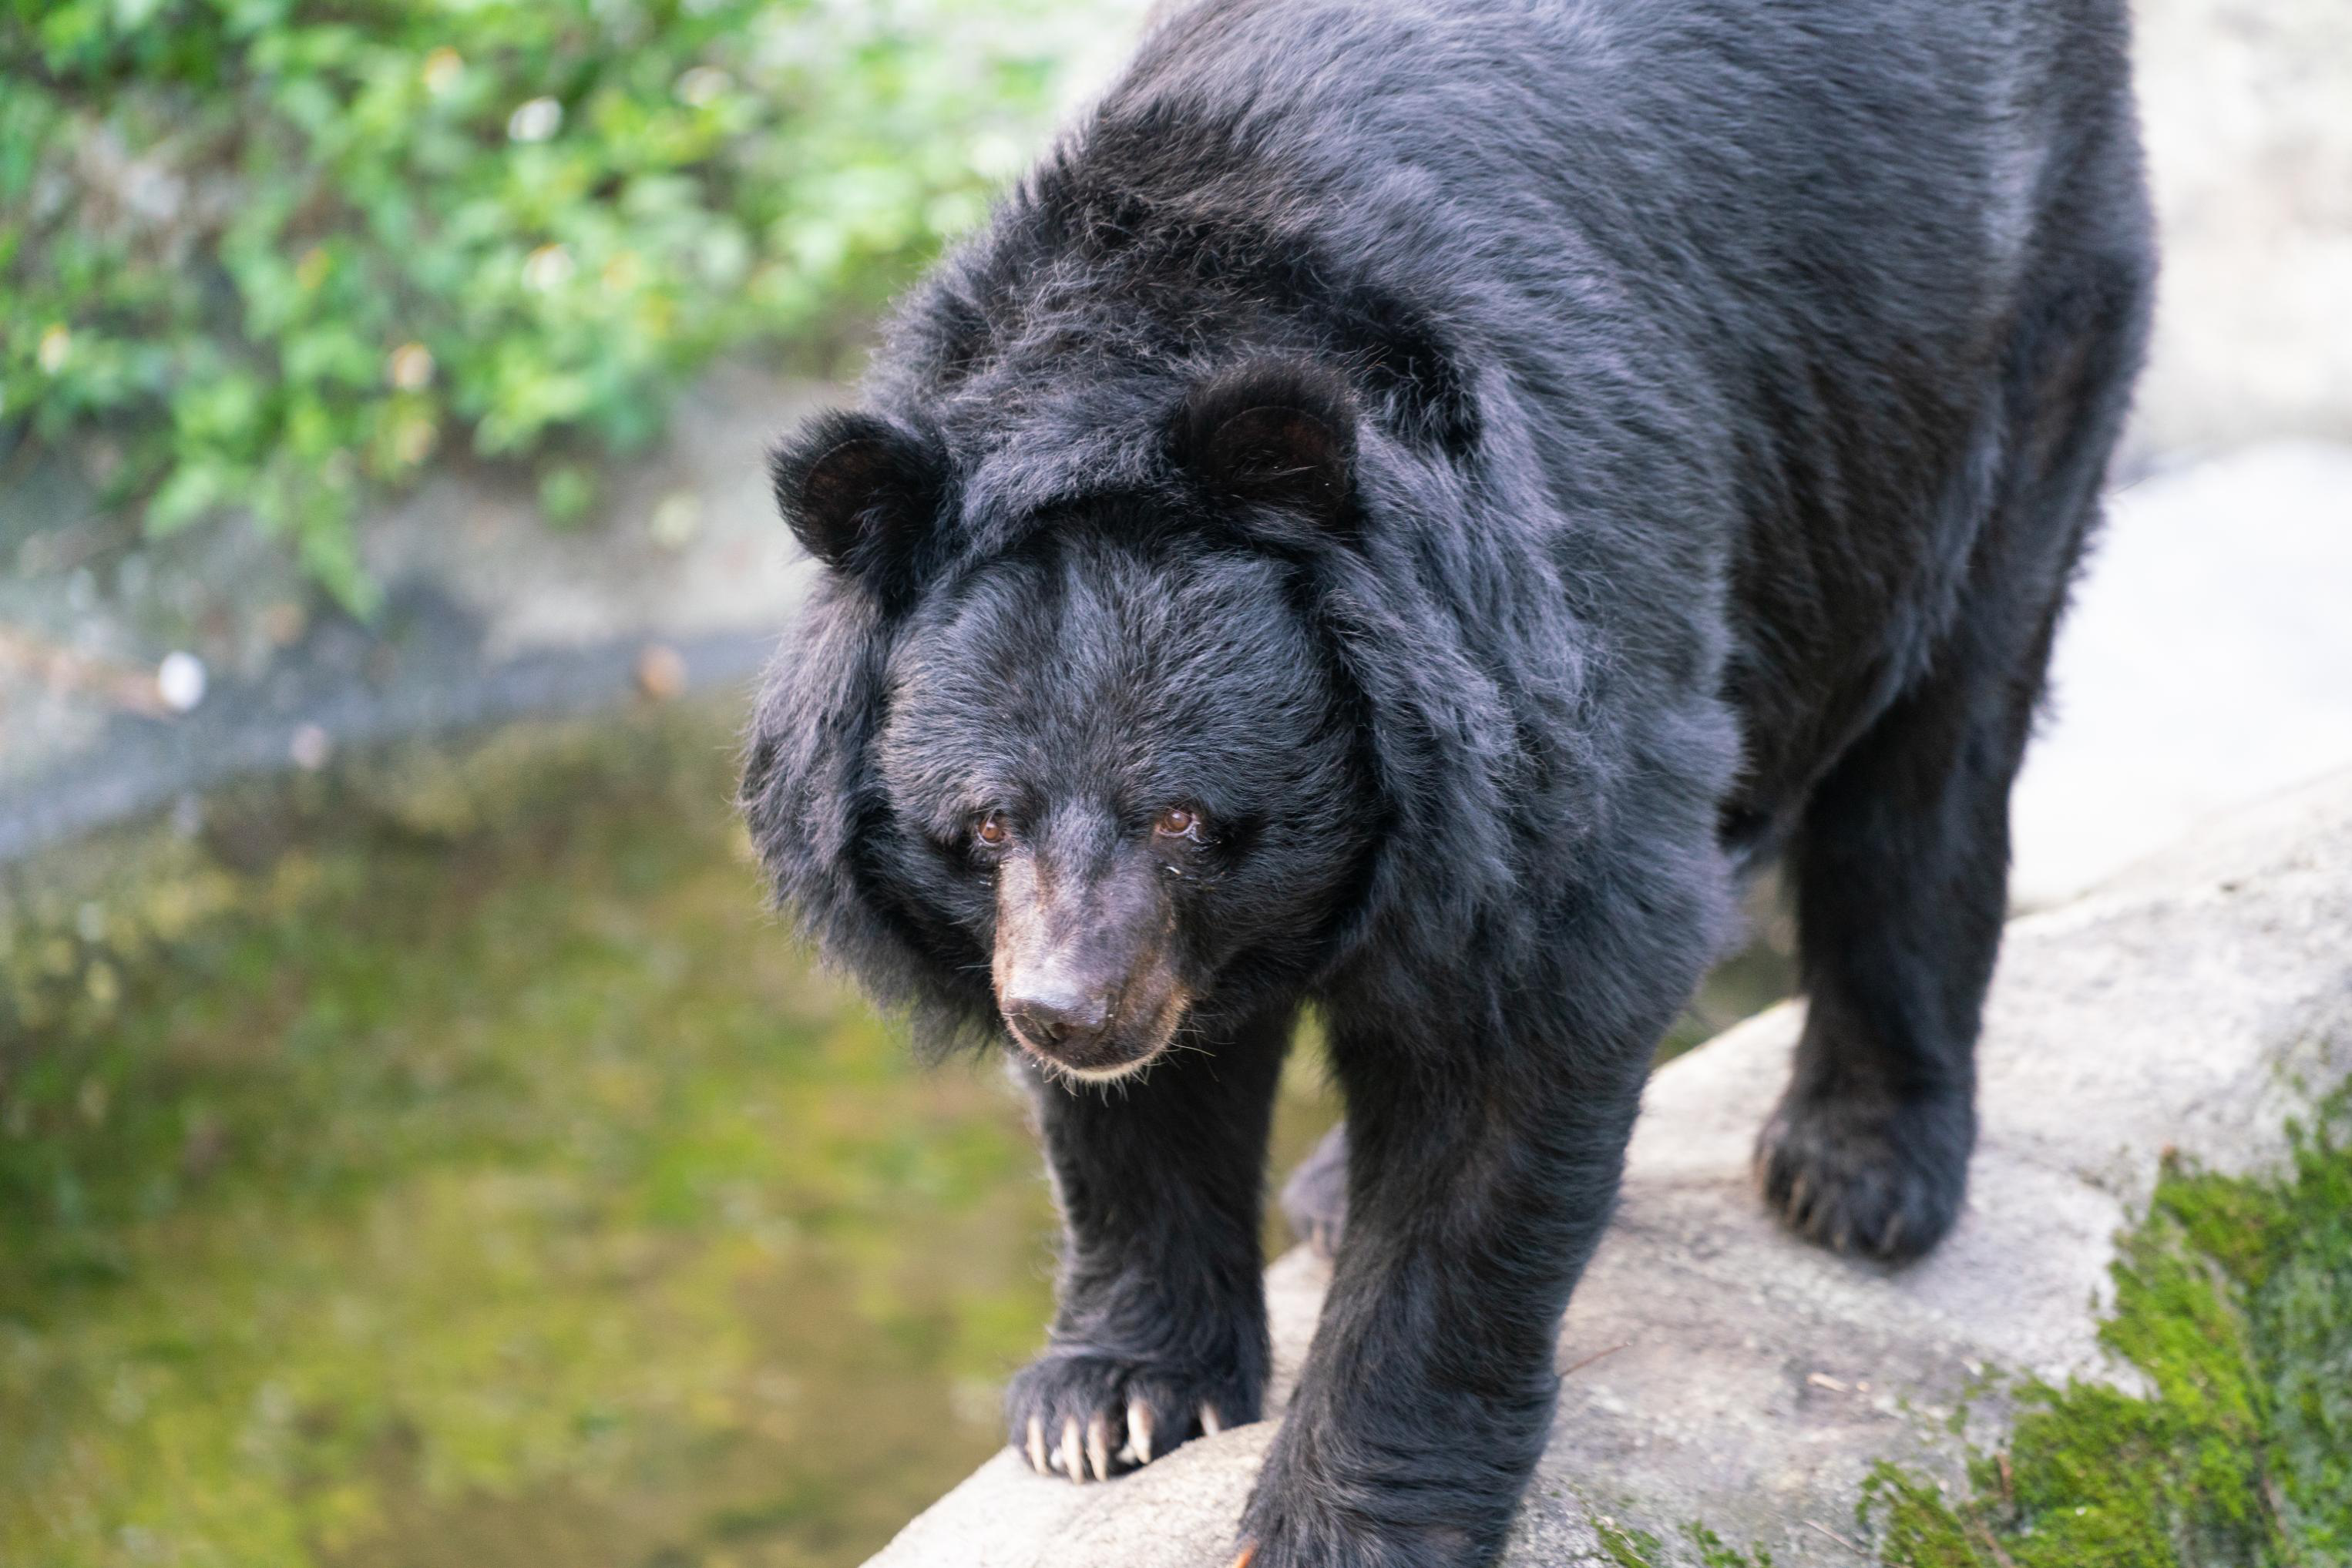

In [6]:
PILImage.create(upload.data[0])

In [7]:
model_loaded.predict(upload.data[0])

('black', tensor(0), tensor([9.9990e-01, 2.8753e-05, 7.1716e-05]))